In [1]:
from research_task_utils import *
from models import *

from torch import nn
import torchvision

In [2]:
batchsize = 512
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

transform = torchvision.transforms.Compose(
    [
        torchvision.transforms.ToTensor()
    ]
)
traindata = torchvision.datasets.CIFAR100(root="./dataset", train=True, download=True, transform=transform)
testdata = torchvision.datasets.CIFAR100(root="./dataset", train=False, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(traindata, batch_size=batchsize, shuffle=True)
testloader = torch.utils.data.DataLoader(testdata, batch_size=batchsize, shuffle=True)

Files already downloaded and verified
Files already downloaded and verified


Начало обучения модели 1 с 984 параметрами


100%|█████████████████████████████████████████████████████████████████████████████| 200/200 [42:56<00:00, 12.88s/it]


Модель 1 обучена, 984 параметров
accuracy on test: 0.1014


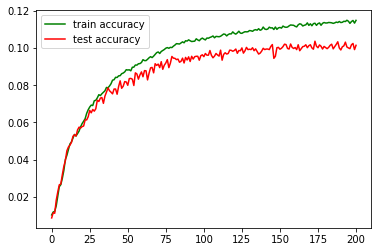

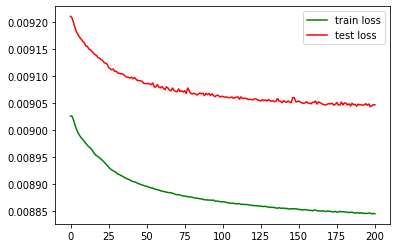

Начало обучения модели 2 с 4956 параметрами


100%|█████████████████████████████████████████████████████████████████████████████| 200/200 [46:13<00:00, 13.87s/it]

Модель 2 обучена, 4956 параметров
accuracy on test: 0.1678


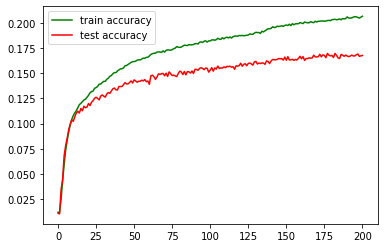

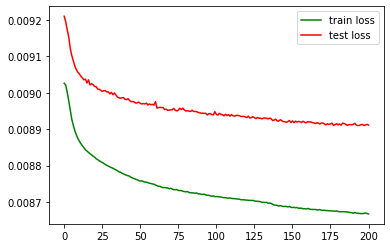

Начало обучения модели 3 с 9636 параметрами


100%|█████████████████████████████████████████████████████████████████████████████| 200/200 [27:26<00:00,  8.23s/it]

Модель 3 обучена, 9636 параметров
accuracy on test: 0.2177


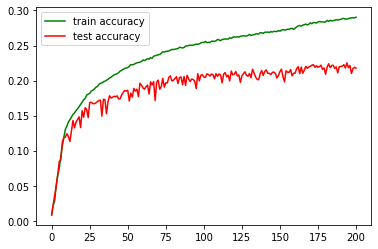

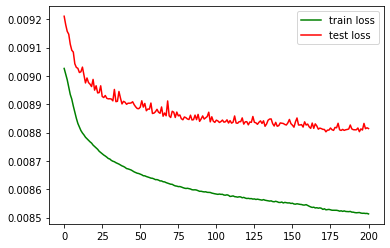

Начало обучения модели 4 с 50548 параметрами


100%|███████████████████████████████████████████████████████████████████████████| 200/200 [1:30:52<00:00, 27.26s/it]

Модель 4 обучена, 50548 параметров
accuracy on test: 0.297


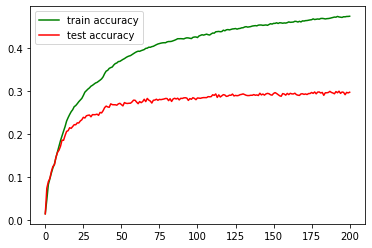

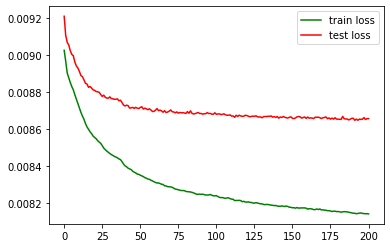

Начало обучения модели 5 с 99844 параметрами


100%|███████████████████████████████████████████████████████████████████████████| 200/200 [2:31:22<00:00, 45.41s/it]

Модель 5 обучена, 99844 параметров
accuracy on test: 0.3553


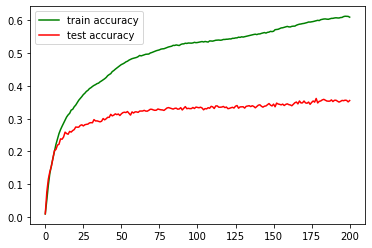

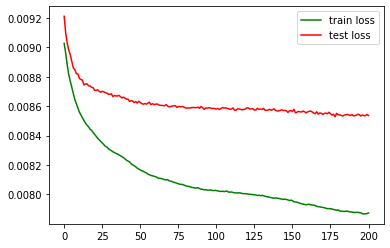

Начало обучения модели 6 с 352388 параметрами


100%|███████████████████████████████████████████████████████████████████████████| 200/200 [2:51:23<00:00, 51.42s/it]

Модель 6 обучена, 352388 параметров
accuracy on test: 0.4078


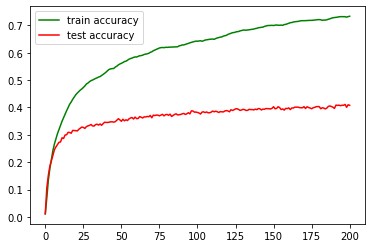

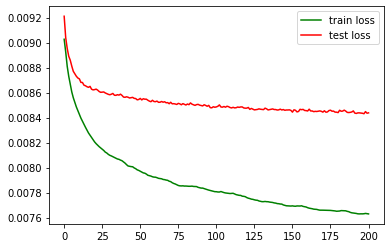

Начало обучения модели 7 с 491524 параметрами


100%|███████████████████████████████████████████████████████████████████████████| 200/200 [3:12:17<00:00, 57.69s/it]

Модель 7 обучена, 491524 параметров
accuracy on test: 0.4334


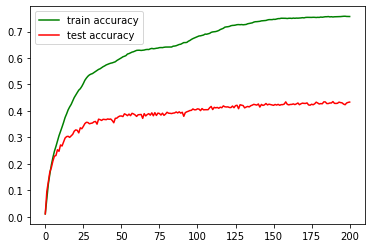

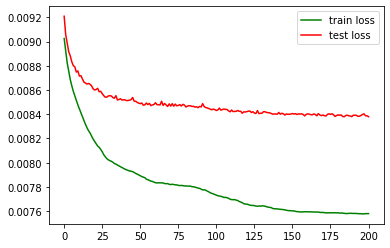

Начало обучения модели 8 с 1068740 параметрами


100%|███████████████████████████████████████████████████████████████████████████| 200/200 [4:01:42<00:00, 72.51s/it]


Модель 8 обучена, 1068740 параметров
accuracy on test: 0.4906


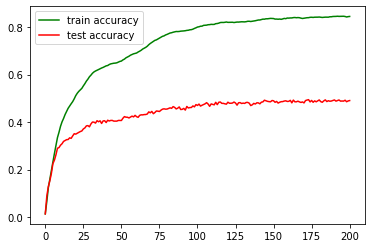

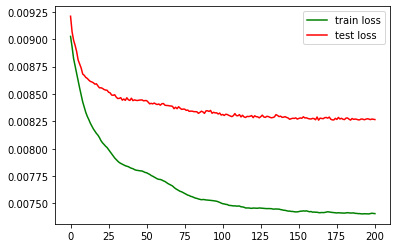

[984, 4956, 9636, 50548, 99844, 352388, 491524, 1068740]
[0.1014, 0.1678, 0.2177, 0.297, 0.3553, 0.4078, 0.4334, 0.4906]
Искомый график:


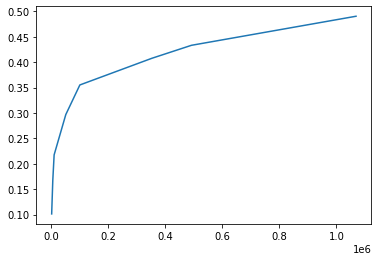

In [3]:
Models = [Model_1, Model_2, Model_3, Model_4, Model_5, Model_6, Model_7, Model_8]
epochs_n = 200

params_counts = []
accs_on_tests = []
for i, Model in enumerate(Models):
    model = Model().to(device)
    params_counts.append(num_of_params(model))
    print(f"Начало обучения модели {i+1} с {params_counts[-1]} параметрами")
    optimizer = torch.optim.Adam(model.parameters())
    loss_function = torch.nn.CrossEntropyLoss()
    statistics_list = init_statistics(model, device, trainloader, testloader, loss_function)
    
    train(model, device, optimizer, loss_function, trainloader, testloader, statistics_list, epochs_n=epochs_n,
          augmenter=None, checkpoints_dir=f"./checkpoints/Model_{i+1}_{params_counts[-1]}_params",
          checkpoints_per=10)
    
    accs_on_tests.append(statistics_list["testacc"][-1])
    print(f"Модель {i+1} обучена, {params_counts[-1]} параметров")
    print(f"accuracy on test: {accs_on_tests[-1]}")
    plot_statistics(statistics_list)
    
print(params_counts)
print(accs_on_tests)
print("Искомый график:")
plt.plot(params_counts, accs_on_tests)

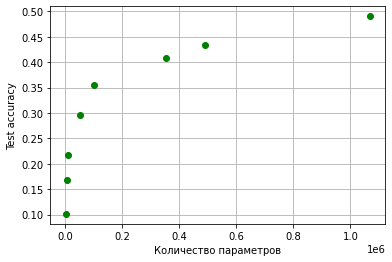

In [15]:
plt.plot(params_counts, accs_on_tests, 'go')
plt.ylabel('Test accuracy')
plt.xlabel('Количество параметров')
plt.grid()
# plt.show()
plt.savefig('result.png', dpi=500)

In [14]:
# Этим можно не пользоваться, если не установлен torchsummary
from torchsummary import summary

print(summary(model, (3, 32, 32)))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             128
       BatchNorm2d-2           [-1, 32, 32, 32]              64
              ReLU-3           [-1, 32, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]           4,224
       BatchNorm2d-5          [-1, 128, 32, 32]             256
              ReLU-6          [-1, 128, 32, 32]               0
            Conv2d-7          [-1, 128, 32, 32]           1,280
       BatchNorm2d-8          [-1, 128, 32, 32]             256
              ReLU-9          [-1, 128, 32, 32]               0
           Conv2d-10           [-1, 32, 32, 32]           4,128
      BatchNorm2d-11           [-1, 32, 32, 32]              64
             ReLU-12           [-1, 32, 32, 32]               0
         Identity-13           [-1, 32, 32, 32]               0
         Parallel-14           [-1, 32,